In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:
!unzip '/content/drive/MyDrive/Flowers-Dataset.zip'


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [44]:
train_data=ImageDataGenerator(rescale=1./255,horizontal_flip=True,vertical_flip=True,zoom_range=0.2)

In [45]:
test_data=ImageDataGenerator(rescale=1./255)

In [46]:
x_train=train_data.flow_from_directory("/content/flowers",target_size=(100,100),class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [47]:
x_test=test_data.flow_from_directory("/content/flowers",target_size=(100,100),class_mode="categorical",batch_size=24)

Found 4317 images belonging to 5 classes.


In [49]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [50]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [51]:
model=Sequential()

In [52]:
model.add(Convolution2D(50,(3,3),activation="relu",input_shape=(100,100,3)))

In [53]:
model.add(MaxPooling2D(pool_size=(2,2)))


In [54]:
model.add(Flatten())


In [55]:
model.add(Dense(300,activation ='relu'))  # Hidden layer 1
model.add(Dense(300,activation ='relu'))  # Hidden layer 2
model.add(Dense(5,activation="softmax"))  # Output layer 

In [56]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer='adam')


In [57]:
len(x_train)


180

In [58]:
model.fit(x_train,epochs=5,validation_data=x_test,steps_per_epoch= len(x_train),validation_steps=len(x_test))


Epoch 1/5
180/180 [==============================] - 93s 511ms/step - loss: 1.4135 - accuracy: 0.4790 - val_loss: 1.0936 - val_accuracy: 0.5886
Epoch 2/5
180/180 [==============================] - 90s 500ms/step - loss: 1.0197 - accuracy: 0.6018 - val_loss: 0.9547 - val_accuracy: 0.6245
Epoch 3/5
180/180 [==============================] - 89s 493ms/step - loss: 0.9220 - accuracy: 0.6368 - val_loss: 0.9255 - val_accuracy: 0.6495
Epoch 4/5
180/180 [==============================] - 89s 492ms/step - loss: 0.9022 - accuracy: 0.6528 - val_loss: 1.0863 - val_accuracy: 0.6215
Epoch 5/5
180/180 [==============================] - 89s 494ms/step - loss: 0.8568 - accuracy: 0.6715 - val_loss: 0.7607 - val_accuracy: 0.7060


In [60]:
model.save("flower.h5")


In [34]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [25]:
model=load_model("/content/flower.h5")


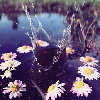

In [61]:
img=image.load_img("/content/flowers/daisy/10172379554_b296050f82_n.jpg",target_size=(100,100))
img

In [62]:
x=image.img_to_array(img)
x

array([[[126., 124., 112.],
        [107., 107.,  97.],
        [ 93.,  87.,  87.],
        ...,
        [131., 144., 124.],
        [171., 174., 153.],
        [142., 152., 128.]],

       [[106., 107., 102.],
        [ 91.,  86.,  90.],
        [ 73.,  59.,  74.],
        ...,
        [128., 140., 128.],
        [121., 125., 110.],
        [118., 126., 111.]],

       [[ 97.,  92.,  99.],
        [ 80.,  68.,  82.],
        [ 67.,  49.,  73.],
        ...,
        [105., 113., 102.],
        [118., 127., 108.],
        [110., 121., 104.]],

       ...,

       [[ 26.,  11.,  40.],
        [ 24.,   9.,  38.],
        [ 26.,   7.,  35.],
        ...,
        [ 42.,  18.,  78.],
        [ 46.,  20.,  81.],
        [ 48.,  20.,  81.]],

       [[ 28.,  12.,  41.],
        [ 28.,  12.,  41.],
        [ 22.,   8.,  34.],
        ...,
        [ 47.,  21.,  82.],
        [ 50.,  24.,  85.],
        [ 50.,  22.,  83.]],

       [[ 25.,   9.,  38.],
        [ 26.,  10.,  39.],
        [ 24.,  

In [63]:
x = image.img_to_array(img)
x

array([[[126., 124., 112.],
        [107., 107.,  97.],
        [ 93.,  87.,  87.],
        ...,
        [131., 144., 124.],
        [171., 174., 153.],
        [142., 152., 128.]],

       [[106., 107., 102.],
        [ 91.,  86.,  90.],
        [ 73.,  59.,  74.],
        ...,
        [128., 140., 128.],
        [121., 125., 110.],
        [118., 126., 111.]],

       [[ 97.,  92.,  99.],
        [ 80.,  68.,  82.],
        [ 67.,  49.,  73.],
        ...,
        [105., 113., 102.],
        [118., 127., 108.],
        [110., 121., 104.]],

       ...,

       [[ 26.,  11.,  40.],
        [ 24.,   9.,  38.],
        [ 26.,   7.,  35.],
        ...,
        [ 42.,  18.,  78.],
        [ 46.,  20.,  81.],
        [ 48.,  20.,  81.]],

       [[ 28.,  12.,  41.],
        [ 28.,  12.,  41.],
        [ 22.,   8.,  34.],
        ...,
        [ 47.,  21.,  82.],
        [ 50.,  24.,  85.],
        [ 50.,  22.,  83.]],

       [[ 25.,   9.,  38.],
        [ 26.,  10.,  39.],
        [ 24.,  

In [64]:
x=np.expand_dims(x,axis=0)
x

array([[[[126., 124., 112.],
         [107., 107.,  97.],
         [ 93.,  87.,  87.],
         ...,
         [131., 144., 124.],
         [171., 174., 153.],
         [142., 152., 128.]],

        [[106., 107., 102.],
         [ 91.,  86.,  90.],
         [ 73.,  59.,  74.],
         ...,
         [128., 140., 128.],
         [121., 125., 110.],
         [118., 126., 111.]],

        [[ 97.,  92.,  99.],
         [ 80.,  68.,  82.],
         [ 67.,  49.,  73.],
         ...,
         [105., 113., 102.],
         [118., 127., 108.],
         [110., 121., 104.]],

        ...,

        [[ 26.,  11.,  40.],
         [ 24.,   9.,  38.],
         [ 26.,   7.,  35.],
         ...,
         [ 42.,  18.,  78.],
         [ 46.,  20.,  81.],
         [ 48.,  20.,  81.]],

        [[ 28.,  12.,  41.],
         [ 28.,  12.,  41.],
         [ 22.,   8.,  34.],
         ...,
         [ 47.,  21.,  82.],
         [ 50.,  24.,  85.],
         [ 50.,  22.,  83.]],

        [[ 25.,   9.,  38.],
       

In [65]:
y=np.argmax(model.predict(x),axis=0)

1/1 [==============================] - 0s 118ms/step


In [66]:
y

array([0, 0, 0, 0, 0])

In [67]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [68]:
class_name=["Daisy","Dandelion","Rose","Sunflower","Tulip"]

In [69]:
class_name[y[0]]

'Daisy'